#### 1.0 Set Up

In [2]:
# pytorch
import torch
from torch import nn

# machine learning
import pandas as pd
import numpy as np

# scikit-learn (dataset)
import sklearn
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

# file
from pathlib import Path
import requests

# visualization
import matplotlib.pyplot as plt

# print(torch.__version__)
# print(np.__version__)

#### 2.0 Raw Data Visualization

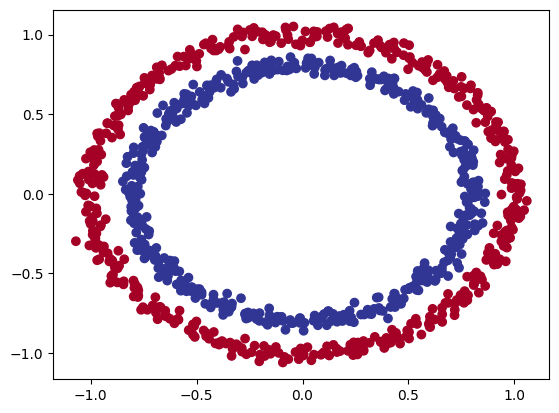

In [12]:
n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=12)

# print(X[:5])
# print(y[:5])

"""
#1 visualization: table
"""
circles = pd.DataFrame({"X1": X[:, 0],
                         "X2": X[:, 1],
                         "label": y})

# print(circles.head())

"""
#2 visualization: scatter plot
"""
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

#### 3.0 Convert Data to Tensors

In [13]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

#### 4.0 Split Data

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=12)

# print(X_train[:5], y_train[:5])

tensor([[ 0.1676,  0.7934],
        [-0.5932,  0.5356],
        [-0.4413, -0.9108],
        [ 0.3075, -0.7326],
        [-0.6851,  0.5067]]) tensor([1., 1., 0., 1., 1.])
